# Python Lesson 3 

In [27]:
import numpy as np

In [28]:
import timeit

# Exercise 3.1 (Conditionals)

In [29]:
dog_age = 3
human_age = 0

In [30]:
if dog_age == 1:
    human_age = 14
elif dog_age == 2:
    human_age = 22
else:
    human_age = 22+(dog_age - 2)*5

In [31]:
print(human_age)

27


# Exercise 3.2 (for-loops)

In [36]:
setup_code = """
import numpy as np
size = 100
A = np.random.rand(size, size)
B = np.random.rand(size, size)
"""

loop_code = """
Mproduct = np.zeros((size, size))
for a in range(size):
    for b in range(size):
        for c in range(size):
            Mproduct[a, b] += A[a, c] * B[c, b]
"""

t_loop = timeit.timeit(stmt=loop_code, setup=setup_code, number=50)
t_loop

12.95095117999881

In [35]:
setup_code2 = """
import numpy as np
size = 100
A = np.random.rand(size, size)
B = np.random.rand(size, size)
C = np.matmul(A, B)
"""

timeit.timeit(stmt=setup_code2, number=50)

0.01920076099850121

# Exercise 3.3 (Function evaluations)

In [37]:
# grid
x_exp = np.linspace(0, 5, 2001)
f_direct = np.exp(x_exp)

In [38]:
h = x_exp[1] - x_exp[0]
f_rec = np.zeros_like(x_exp)

f_rec[0] = 1.0
for i in range(1, len(x_exp)):
    f_rec[i] = f_rec[i-1] * np.exp(h)

# quick check (ratio should be ~1)
print(np.max(np.abs(f_rec - f_direct)))

2.992806003021542e-11


In [39]:
block_exp_loop = '''
import numpy as np
N = 2001
x_exp = np.linspace(0, 5, N)
h = x_exp[1] - x_exp[0]
f_rec = np.zeros_like(x_exp)
f_rec[0] = 1.0
for i in range(1, N):
    f_rec[i] = f_rec[i-1] * np.exp(h)
'''

block_exp_np = '''
import numpy as np
N = 2001
x_exp = np.linspace(0, 5, N)
f_direct = np.exp(x_exp)
'''

print("Loop exp:", timeit.timeit(stmt=block_exp_loop, number=44))
print("NumPy exp:", timeit.timeit(stmt=block_exp_np, number=44))

Loop exp: 0.0633514919973095
NumPy exp: 0.0017602540028747171


In [40]:
x_log = np.linspace(1, 5, 2001)
g_direct = np.log(x_log)

In [41]:
h = x_log[1] - x_log[0]
g_rec = np.zeros_like(x_log)

g_rec[0] = np.log(x_log[0])  # start value at x0=1 is log(1)=0 anyway
for i in range(1, len(x_log)):
    u = h / x_log[i-1]       # u = h/x_n
    ln1pu = u - (u**2)/2 + (u**3)/3 - (u**4)/4
    g_rec[i] = g_rec[i-1] + ln1pu

# quick check (max error)
print(np.max(np.abs(g_rec - g_direct)))

7.993605777301127e-13


In [42]:
block_log_loop = '''
import numpy as np
N = 2001
x_log = np.linspace(1, 5, N)
h = x_log[1] - x_log[0]
g_rec = np.zeros_like(x_log)
g_rec[0] = np.log(x_log[0])
for i in range(1, N):
    u = h / x_log[i-1]
    ln1pu = u - (u**2)/2 + (u**3)/3 - (u**4)/4
    g_rec[i] = g_rec[i-1] + ln1pu
'''

block_log_np = '''
import numpy as np
N = 2001
x_log = np.linspace(1, 5, N)
g_direct = np.log(x_log)
'''

print("Loop log:", timeit.timeit(stmt=block_log_loop, number=44))
print("NumPy log:", timeit.timeit(stmt=block_log_np, number=44))

Loop log: 0.053656810996471904
NumPy log: 0.0013595499985967763


# Exercise 3.4 (Hyperpolic function tailor series)

In [43]:
x = 2.5
Tol = 1e-9

s = 0.0          # running sum
term = x         # first term = x
k = 0            # counts term index (0 -> x, 1 -> x^3/3!, ...)

while abs(term) > Tol:
    s += term
    k += 1
    # update term: next term = previous * x^2 / ((2k)(2k+1))
    term = term * x**2 / ((2*k)*(2*k+1))

print("Approx sinh(x):", s)
print("np.sinh(x):", np.sinh(x))
print("Abs error:", abs(s - np.sinh(x)))
print("Number of terms used:", k)

Approx sinh(x): 6.050204480736215
np.sinh(x): 6.0502044810397875
Abs error: 3.035722784261452e-10
Number of terms used: 9


In [47]:
metdata_orig = np.loadtxt("T_Alicante_EM.csv", delimiter=",", skiprows=1)

metdata_orig


year = metdata_orig[:, 0].astype(int)
data = metdata_orig[:, 1:].copy()   # temps only, shape (nyears, 12)

# ---- Annual seasonal averages (one value per year) ----
spring_year = np.mean(data[:, 2:5], axis=1)   # Mar-Apr-May
summer_year = np.mean(data[:, 5:8], axis=1)   # Jun-Jul-Aug
fall_year   = np.mean(data[:, 8:11], axis=1)  # Sep-Oct-Nov

# Winter: Dec(prev year) + Jan + Feb
# We'll compute winter for years 2..end (because need previous Dec)
winter_year = np.full(len(year), np.nan)      # fill with NaN first
for i in range(1, len(year)):
    winter_year[i] = np.mean([data[i-1, 11], data[i, 0], data[i, 1]])

# ---- Total seasonal averages (one value per season across all years) ----
spring_total = np.nanmean(spring_year)
summer_total = np.nanmean(summer_year)
fall_total   = np.nanmean(fall_year)
winter_total = np.nanmean(winter_year)

print("Total seasonal averages:")
print("Spring:", spring_total)
print("Summer:", summer_total)
print("Fall:  ", fall_total)
print("Winter:", winter_total)

Total seasonal averages:
Spring: 16.46014705882353
Summer: 24.88345588235294
Fall:   19.747328431372548
Winter: 12.442543209876543


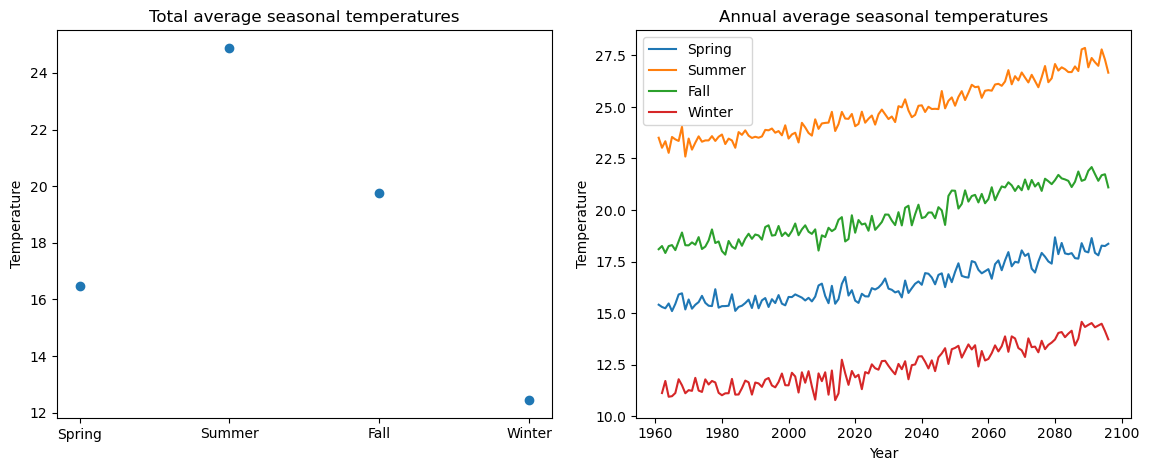

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(pad=3.0)

# Top: total seasonal averages
ax[0].plot([1,2,3,4], [spring_total, summer_total, fall_total, winter_total], marker="o", linestyle="none")
ax[0].set_xticks([1,2,3,4], ["Spring","Summer","Fall","Winter"])
ax[0].set_title("Total average seasonal temperatures")
ax[0].set_ylabel("Temperature")

# Bottom: annual seasonal averages
ax[1].plot(year, spring_year, label="Spring")
ax[1].plot(year, summer_year, label="Summer")
ax[1].plot(year, fall_year,   label="Fall")
ax[1].plot(year, winter_year, label="Winter")
ax[1].set_title("Annual average seasonal temperatures")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Temperature")
ax[1].legend()

plt.show()